# Data Preprocessing

#### Importing Libraries

In [15]:
# !pip install xgboost

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

#### Loading Dataset

In [17]:
augmented_data = pd.read_csv('Augmented_Data.csv')

#### Preparing features and target

In [18]:
X = augmented_data.drop(columns=['prognosis'])
y = augmented_data['prognosis']

#### Encoding the target variable

In [19]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#### Spliting into training and testing sets (80% train, 20% test)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model Training

#### Using XGBoost Model(Gradient Boosting)

In [21]:
model = XGBClassifier(random_state=42, max_depth=10, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### Making Prediction on the test data

In [22]:
y_pred = model.predict(X_test)

#### Evaluating the model

In [23]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#### Printing the evaluation results

In [24]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9992682926829268

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       220
           2       0.99      1.00      1.00       193
           3       1.00      1.00      1.00       212
           4       1.00      1.00      1.00       221
           5       1.00      1.00      1.00       197
           6       1.00      1.00      1.00       189
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       186
           9       0.99      1.00      1.00       211
          10       1.00      1.00      1.00       190
          11       1.00      1.00      1.00       187
          12       1.00      1.00      1.00       199
          13       1.00      1.00      1.00       191
          14       1.00      0.99      1.00       193
          15       1.00      1.00      1.00       207
          16       1.00    

# Visualizing the Model

#### Importing Libraries

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Symptom Frequency Plot

C:\Users\daans\AppData\Local\Temp\ipykernel_24312\2994103934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")


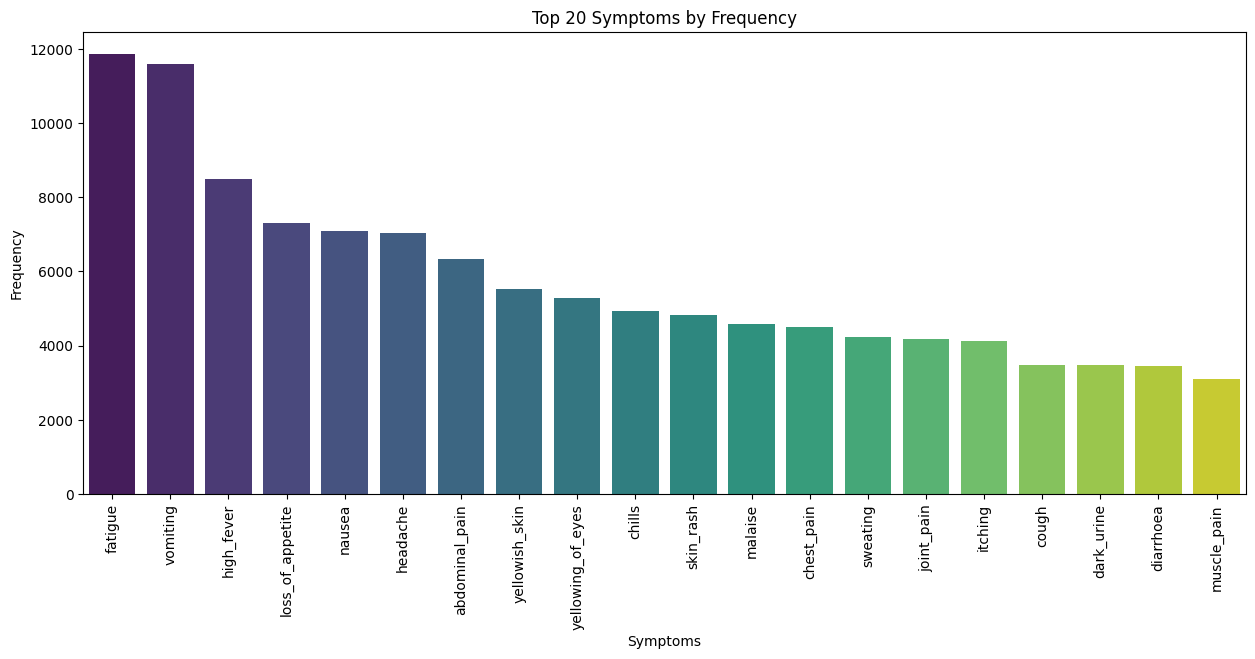

In [26]:
plt.figure(figsize=(15, 6))
symptom_counts = X_train.sum().sort_values(ascending=False).head(20)  # Top 20 symptoms by frequency
sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 20 Symptoms by Frequency")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.show()

#### Confusion Matrix

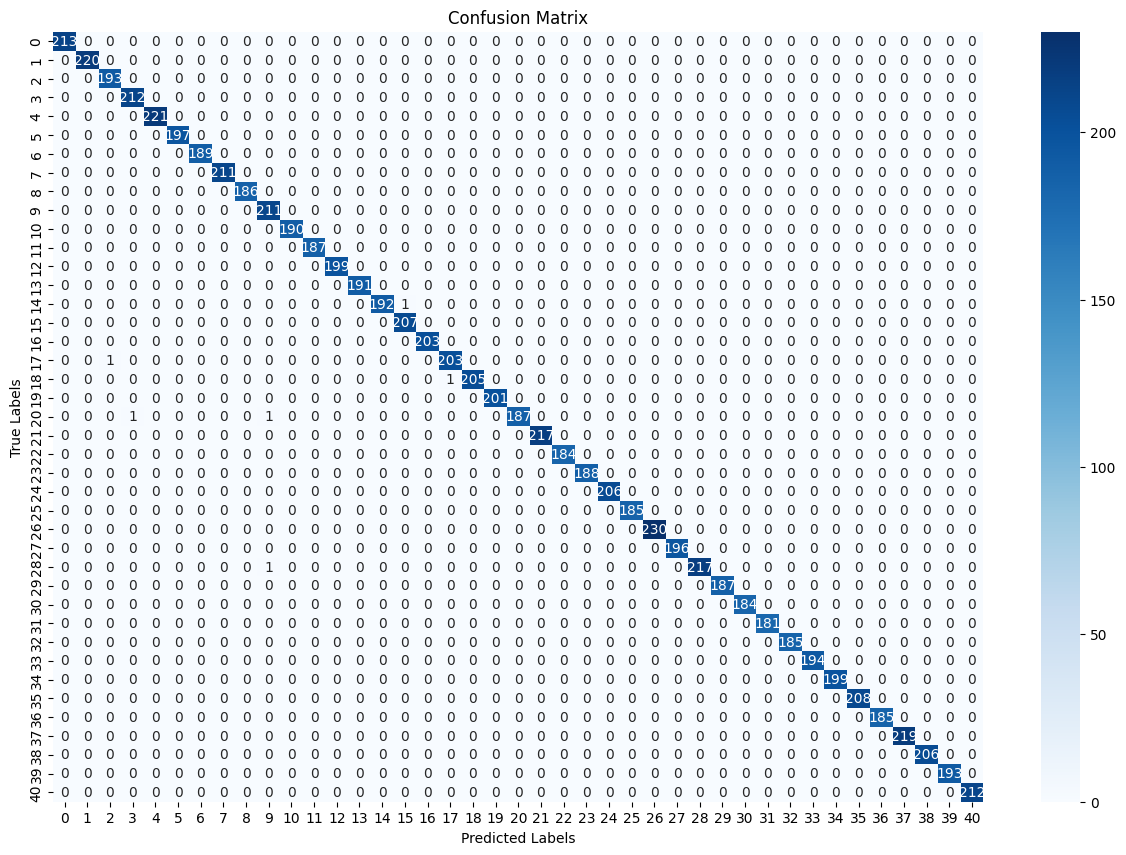

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Saving Model

In [28]:
import joblib
joblib.dump(model, 'final_model3.joblib')


['final_model3.joblib']